# Exploratory Data Analysis

## Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Data description

### Client data

| Feature Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| id                             | Client company identifier                                                                             |
| activity_new                   | Category of the company’s activity                                                                    |
| channel_sales                  | Code of the sales channel                                                                             |
| cons_12m                       | Electricity consumption of the past 12 months                                                         |
| cons_gas_12m                   | Gas consumption of the past 12 months                                                                 |
| cons_last_month                | Electricity consumption of the last month                                                             |
| date_activ                     | Date of activation of the contract                                                                    |
| date_end                       | Registered date of the end of the contract                                                            |
| date_modif_prod                | Date of the last modification of the product                                                          |
| date_renewal                   | Date of the next contract renewal                                                                     |
| forecast_cons_12m              | Forecasted electricity consumption for the next 12 months                                             |
| forecast_cons_year             | Forecasted electricity consumption for the next calendar year                                         |
| forecast_discount_energy       | Forecasted value of current discount                                                                  |
| forecast_meter_rent_12m        | Forecasted bill of meter rental for the next 2 months                                                 |
| forecast_price_energy_off_peak | Forecasted energy price for 1st period (off peak)                                                     |
| forecast_price_energy_peak     | Forecasted energy price for 2nd period (peak)                                                         |
| forecast_price_pow_off_peak    | Forecasted power price for 1st period (off peak)                                                      |
| has_gas                        | Indicated if client is also a gas client                                                              |
| imp_cons                       | Current paid consumption                                                                              |
| margin_gross_pow_ele           | Gross margin on power subscription                                                                    |
| margin_net_pow_ele             | Net margin on power subscription                                                                      |
| nb_prod_act                    | Number of active products and services                                                                |
| net_margin                     | Total net margin                                                                                      |
| num_years_antig                | Antiquity of the client (in number of years)                                                          |
| origin_up                      | Code of the electricity campaign the customer first subscribed to                                     |
| pow_max                        | Subscribed power                                                                                      |
| churn                          | Has the client churned over the next 3 months                                                         |


### Price data

| Feature Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| id                             | Client company identifier                                                                             |
| price_date                     | Reference date                                                                                        |
| price_off_peak_var             | Price of energy for the 1st period (off peak)                                                         |
| price_peak_var                 | Price of energy for the 2nd period (peak)                                                             |
| price_mid_peak_var             | Price of energy for the 3rd period (mid peak)                                                         |
| price_off_peak_fix             | Price of power for the 1st period (off peak)                                                          |
| price_peak_fix                 | Price of power for the 2nd period (peak)                                                              |
| price_mid_peak_fix             | Price of power for the 3rd period (mid peak)                                                          |


---

## Dimensions of data

In [7]:
client_df.shape

(14606, 26)

In [8]:
print('Client data dimension')
print(f'- Number of rows: {client_df.shape[0]}')
print(f'- Number of cols: {client_df.shape[1]}')

Client data dimension
- Number of rows: 14606
- Number of cols: 26


In [9]:
price_df.shape

(193002, 8)

In [10]:
print('Price data dimension')
print(f'- Number of rows: {price_df.shape[0]}')
print(f'- Number of cols: {price_df.shape[1]}')

Price data dimension
- Number of rows: 193002
- Number of cols: 8


---

## Descriptive statistics of data

### Data types of columns

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


- The features `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal` should have the data type of datetime.
- The feature `channel_sales` has missing values with the value 'MISSING'.
- The feature `has_gas` has binary values, which are 't' for True and 'f' for False, thus requiring binary encoding.

In [13]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


- The feature `price_date` should have the data type of datetime.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [14]:
client_df.describe(percentiles=[.25, .50, .75, .85, .95])

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
85%,8.667500e+04,3.042000e+03,7254.000000,3603.697500,2975.250000,0.000000,132.550000,0.161454,0.100123,44.311378,321.005000,34.680000,34.672500,2.000000,367.290000,6.000000,24.150000,0.000000
95%,9.137718e+05,7.585400e+04,82161.500000,6127.095000,5968.750000,0.000000,145.720000,0.166178,0.101750,46.305378,638.817500,51.720000,51.720000,2.000000,587.685000,7.000000,41.500000,1.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [15]:
price_df.describe(percentiles=[.25, .50, .75, .85, .95])

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
85%,0.163081,0.104382,0.073935,44.444710,24.437330,16.291555
95%,0.170590,0.107161,0.076257,46.444710,24.837586,16.291555
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Number of unique values

In [16]:
def unique_values(dataframe):
    values = {'Feature Name': [],
              'Unique Values': [],
              'Total': []}

    for col in dataframe.columns:
        unique_vals = dataframe[col].unique()
        values['Feature Name'].append(col)
        values['Unique Values'].append(unique_vals)
        values['Total'].append(len(unique_vals))

    return pd.DataFrame(values)

In [17]:
unique_values(client_df)

,Feature Name,Unique Values,Total
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606
1,channel_sales,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm...",8
2,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065
3,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112
4,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751
5,date_activ,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-3...",1796
6,date_end,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-3...",368
7,date_modif_prod,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-3...",2129
8,date_renewal,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-3...",386
9,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993


In [18]:
unique_values(price_df)

,Feature Name,Unique Values,Total
0,id,"[038af19179925da21a25619c5a24b745, 31f2ce54992...",16096
1,price_date,"[2015-01-01, 2015-02-01, 2015-03-01, 2015-04-0...",12
2,price_off_peak_var,"[0.151367, 0.149626, 0.150321, 0.145859, 0.125...",1853
3,price_peak_var,"[0.0, 0.103395, 0.102234, 0.10524, 0.101071, 0...",1189
4,price_mid_peak_var,"[0.0, 0.071536, 0.070375, 0.07515, 0.075096, 0...",711
5,price_off_peak_fix,"[44.26693116, 44.26692996, 44.44470996, 40.565...",66
6,price_peak_fix,"[0.0, 24.33958068, 24.43733004, 24.33957804, 2...",31
7,price_mid_peak_fix,"[0.0, 16.22638872, 16.29155496, 16.22638296, 1...",28


### Detect duplicate values

In [19]:
# Check the features that have duplicate values
print(client_df.duplicated().any())
client_df.duplicated().sum()

False


0

In [20]:
print(price_df.duplicated().any())
price_df.duplicated().sum()

False


0

### Detect missing values

In [21]:
def missing_values(dataframe):
    na = dataframe.isna().sum()
    na_percent = ((na / len(dataframe)) * 100).round(2)
    na_df = pd.DataFrame({'Feature Name': na.index,
                          'Total': na.values,
                          'Percentage (%)': na_percent.values})
    na_df = na_df[na_df['Percentage (%)'] > 0].reset_index(drop=True)
    return na_df

In [22]:
# Check the features that have missing values
print(client_df.isna().values.any())
missing_values(client_df)

False


,Feature Name,Total,Percentage (%)


In [23]:
print(price_df.isna().values.any())
missing_values(price_df)

False


,Feature Name,Total,Percentage (%)


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [24]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.025, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

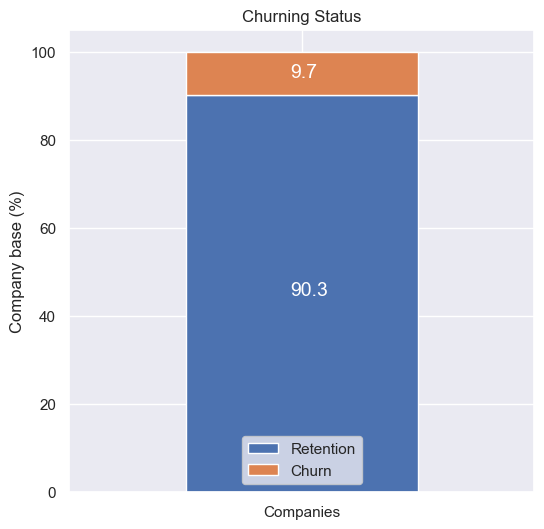

In [25]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

# plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right")
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (6, 6), legend_="lower center")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

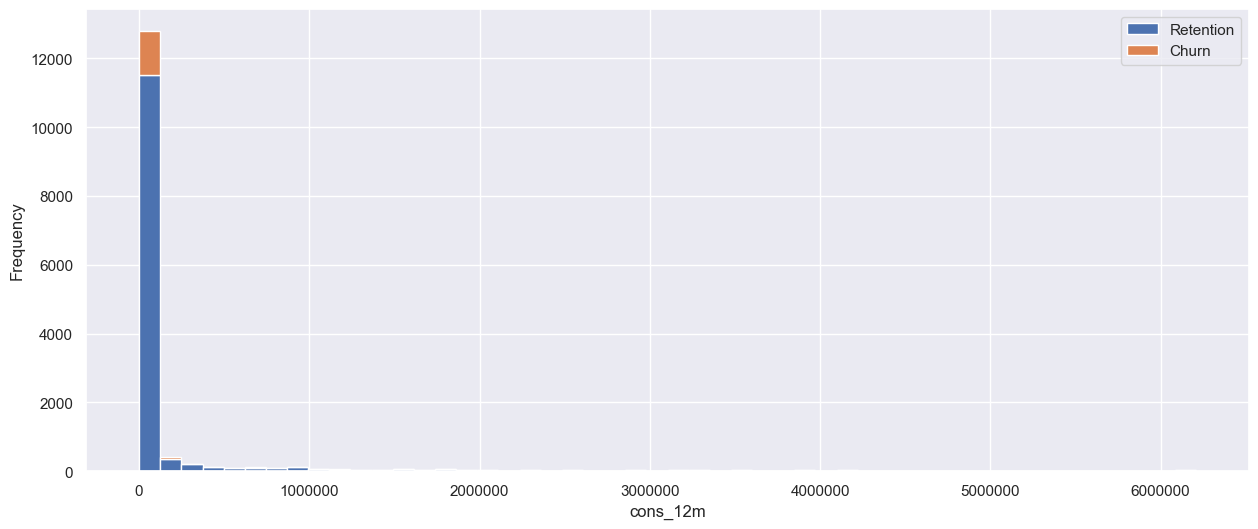

In [26]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(15, 6))

# plot_distribution(dataframe, column, ax, bins_=50)
plot_distribution(consumption, 'cons_12m', axs)

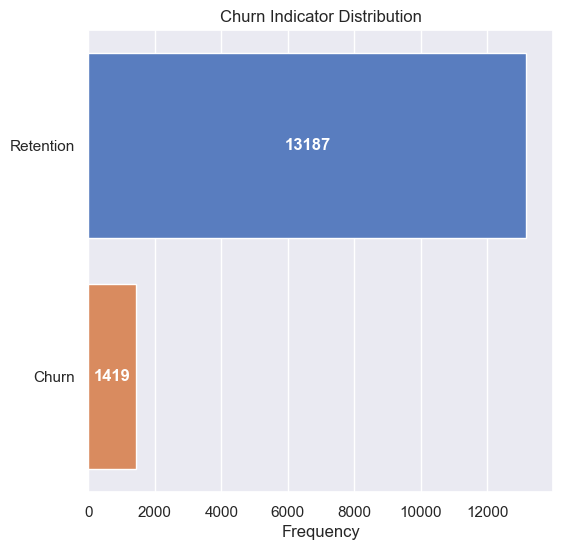

In [27]:
# Distribution of churn indicator
plt.figure(figsize=(6, 6))
ax = sns.countplot(y='churn', data=client_df, palette='muted')

plt.title('Churn Indicator Distribution')
plt.ylabel('')
plt.yticks([0, 1], ['Retention', 'Churn'])
plt.xlabel('Frequency')
plt.xlim(0, 13999)

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.show()

### Distribution of data

In [28]:
# Define numerical and categorical columns
client_num_cols = client_df.select_dtypes(include=['float64', 'int64']).columns
client_cat_cols = client_df.select_dtypes(include=['object']).columns

print('Numerical and categorical client data')
print(f'- Number of numerical features  : {len(client_num_cols)}')
print(f'- Number of categorical features: {len(client_cat_cols)}')

Numerical and categorical client data
- Number of numerical features  : 18
- Number of categorical features: 8


In [29]:
price_num_cols = price_df.select_dtypes(include=['float64', 'int64']).columns
price_cat_cols = price_df.select_dtypes(include=['object']).columns

print('Numerical and categorical price data')
print(f'- Number of numerical features  : {len(price_num_cols)}')
print(f'- Number of categorical features: {len(price_cat_cols)}')

Numerical and categorical price data
- Number of numerical features  : 6
- Number of categorical features: 2


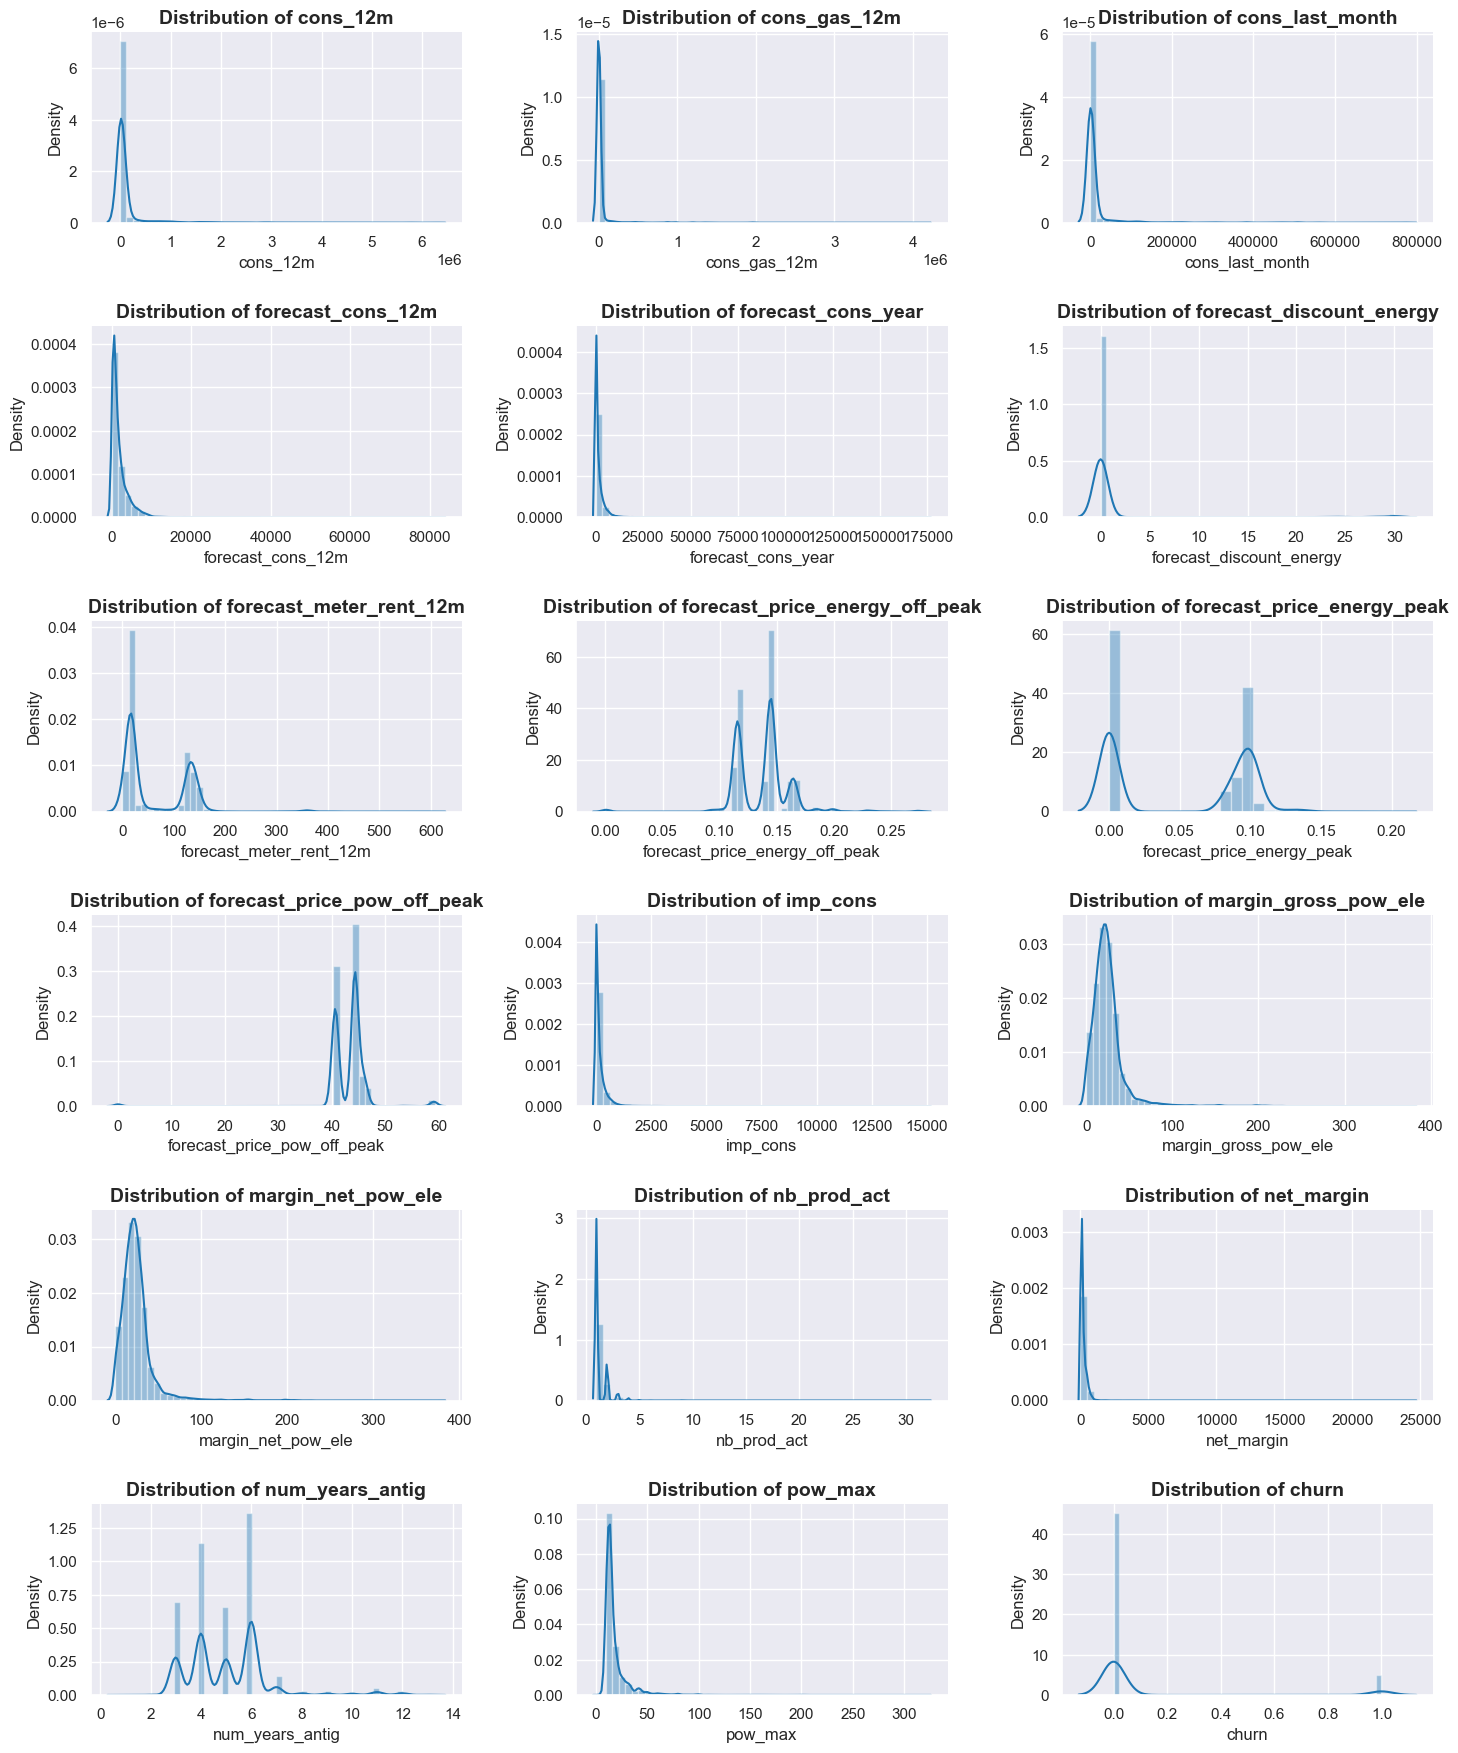

In [30]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i+1)
    sns.distplot(client_df[client_num_cols[i]], color='tab:blue')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

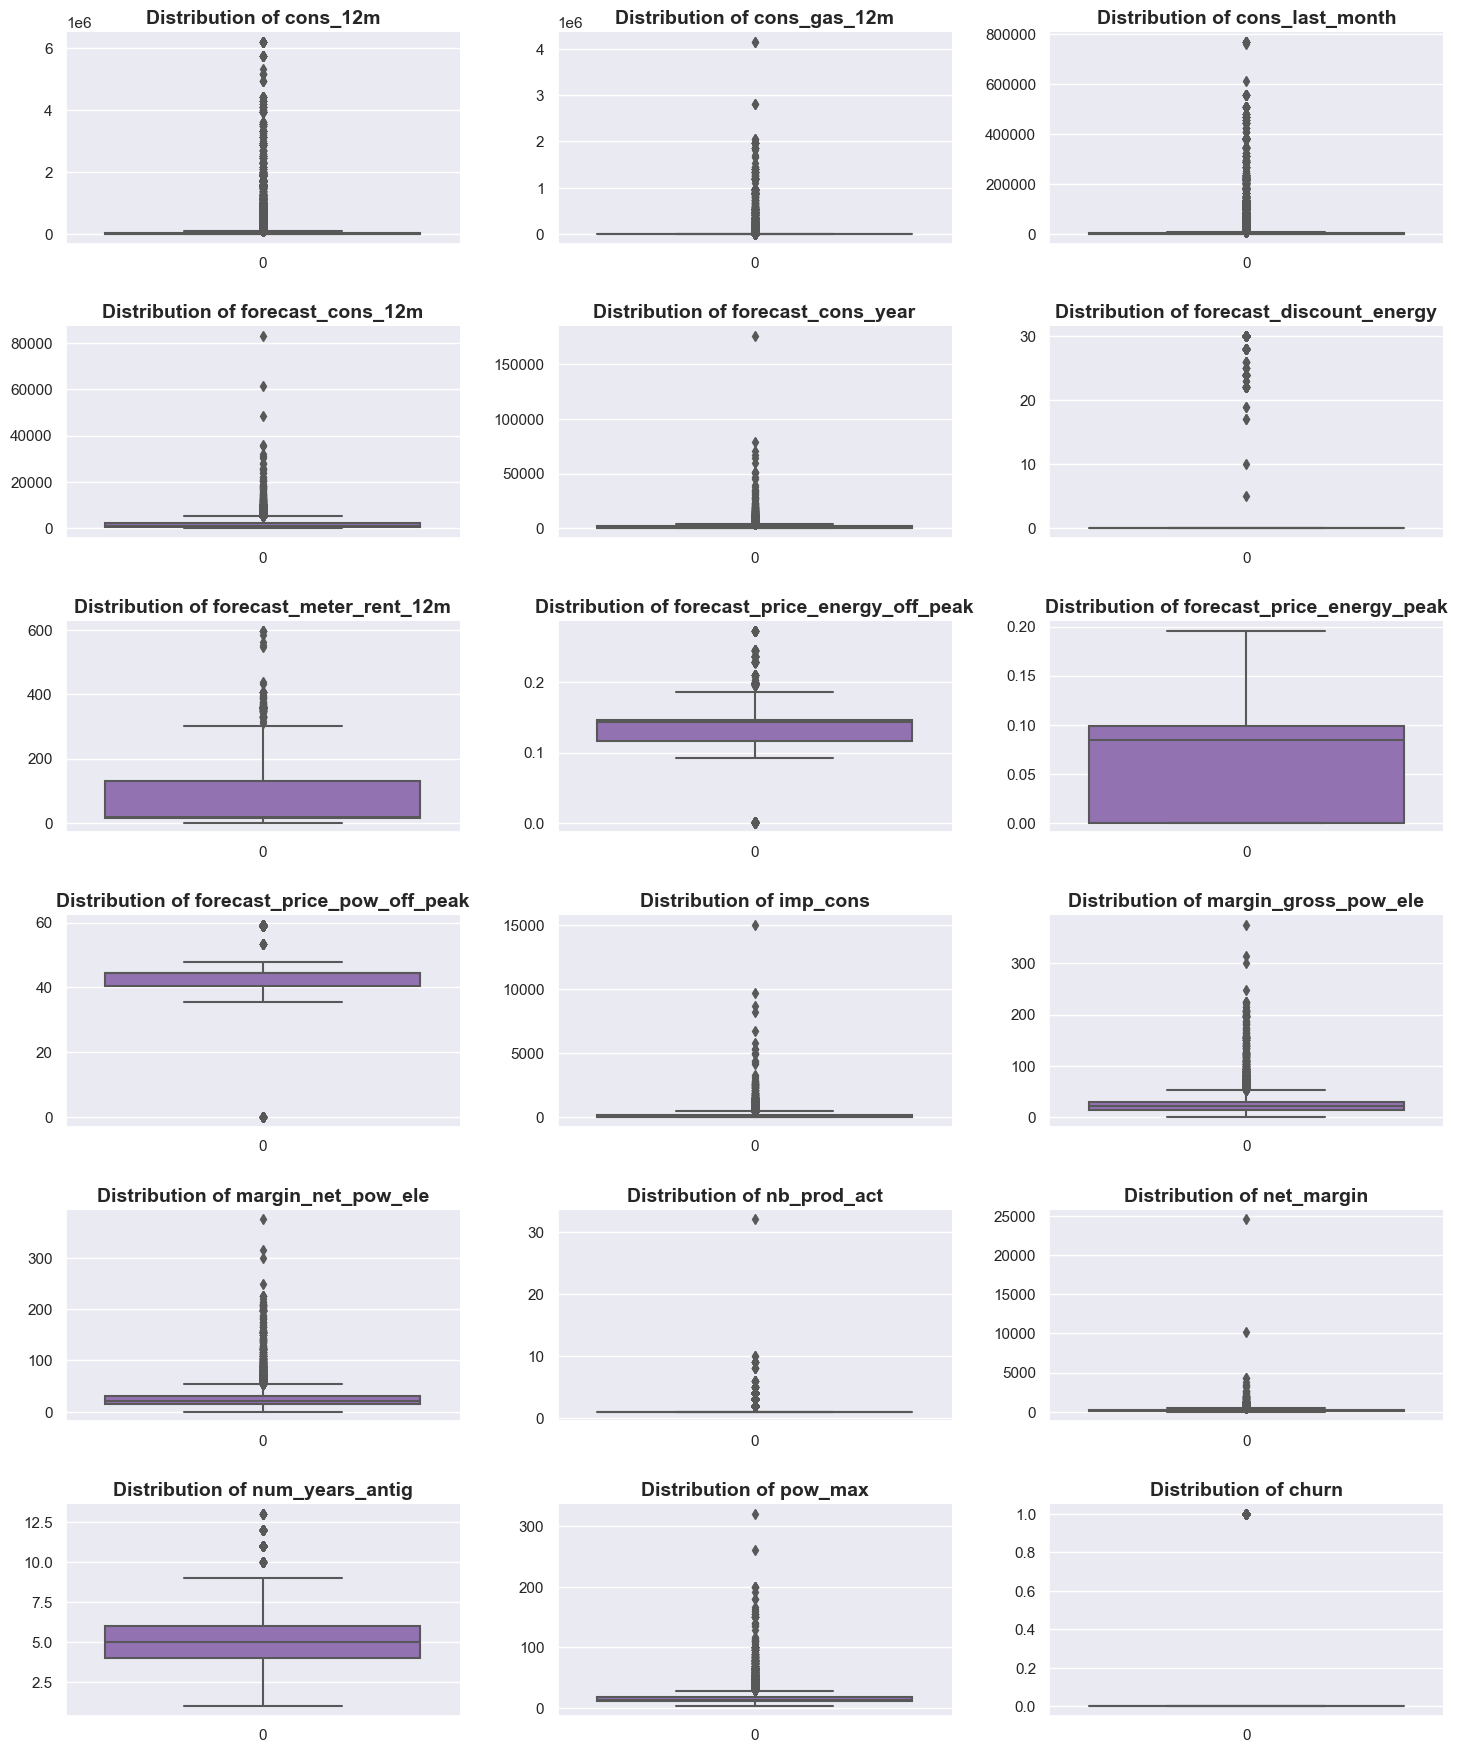

In [31]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(client_df[client_num_cols[i]], color='tab:purple')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

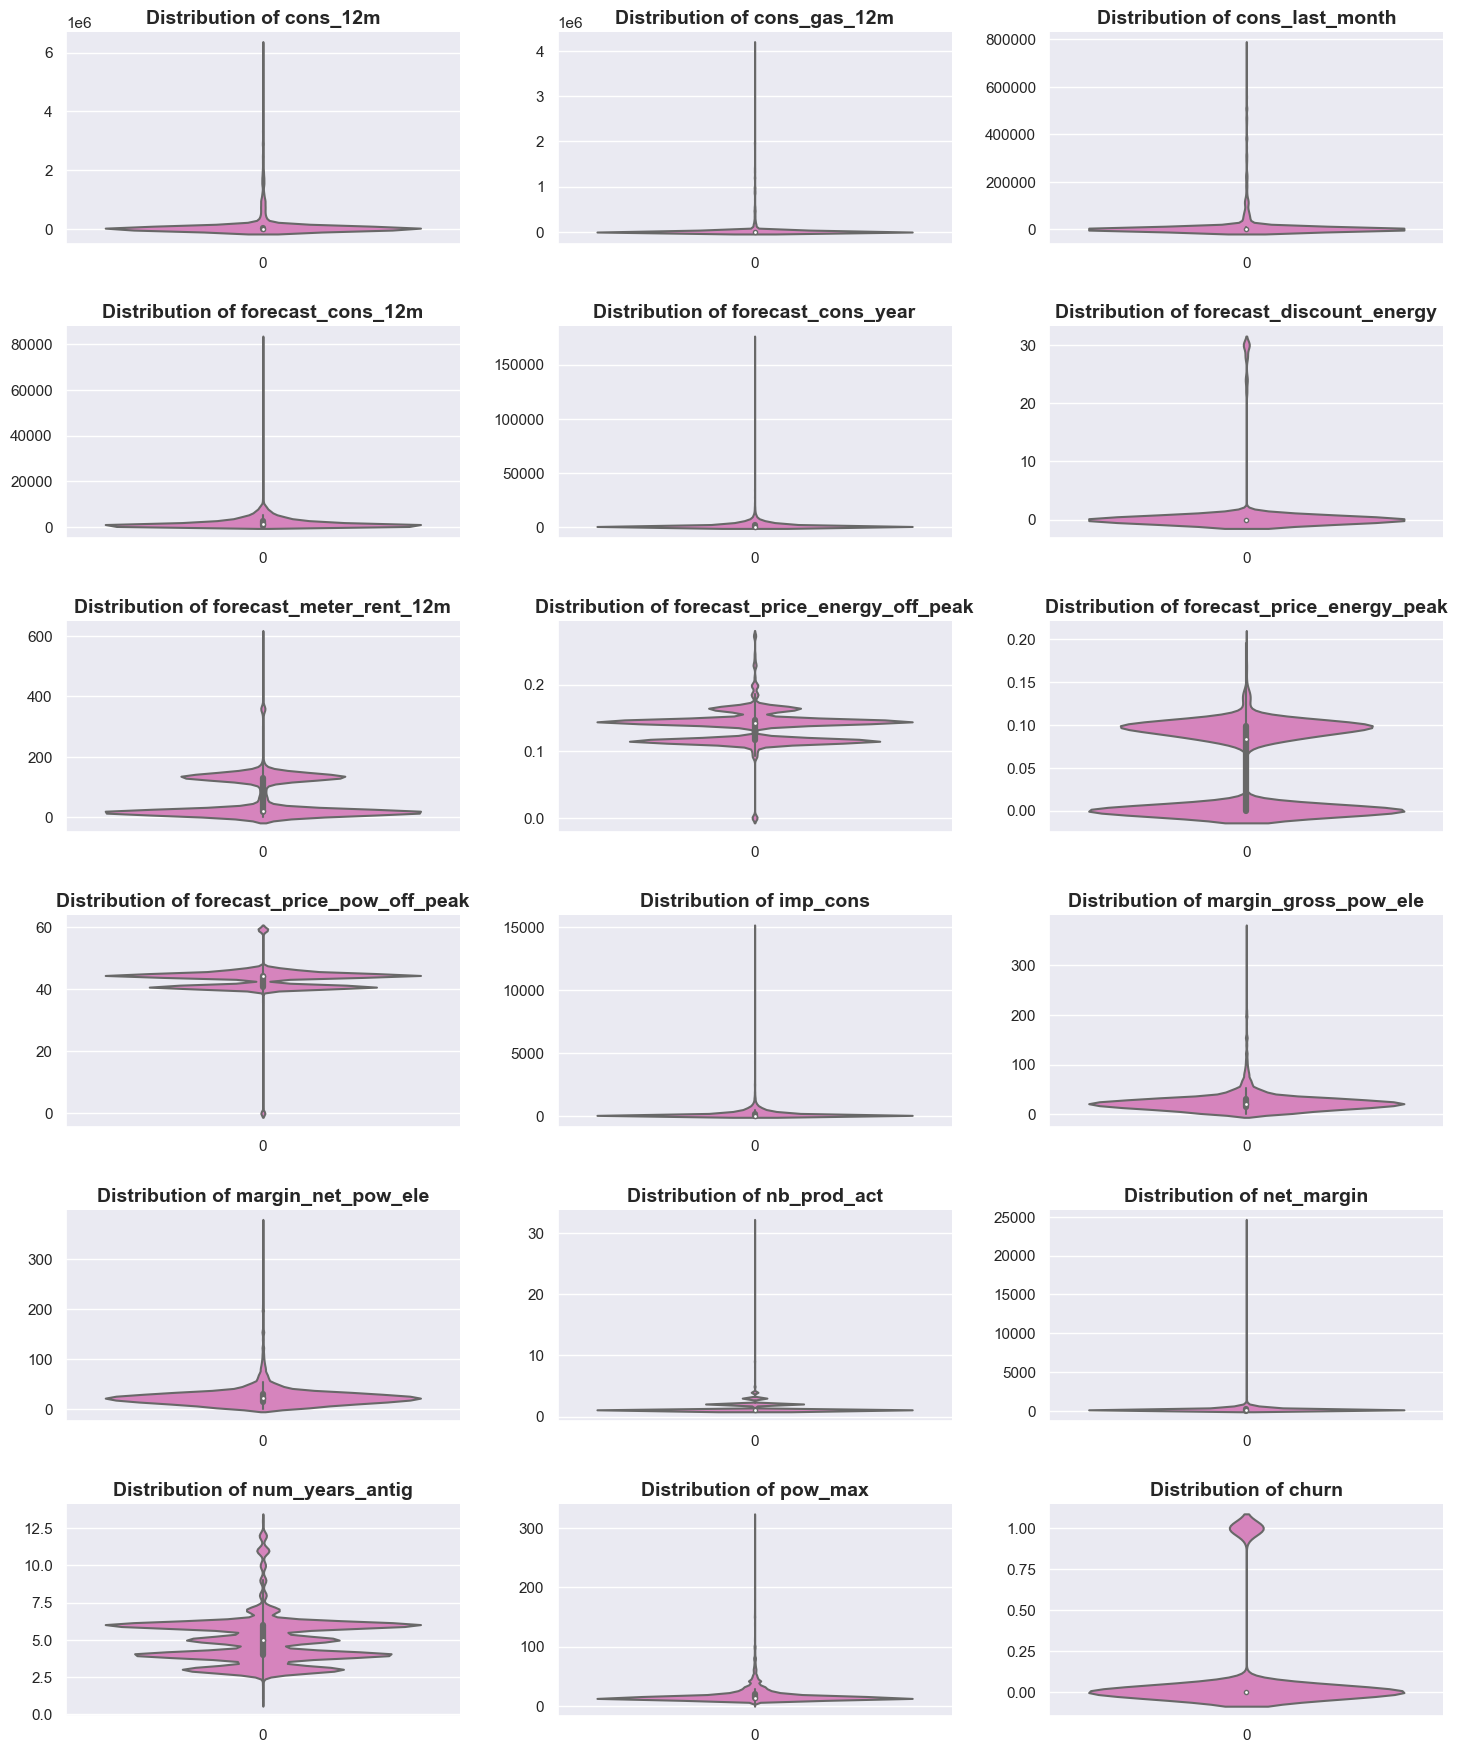

In [32]:
plt.figure(figsize=(15, 18))
for i in range(0, len(client_num_cols)):
    plt.subplot(6, 3, i+1)
    sns.violinplot(client_df[client_num_cols[i]], color='tab:pink')
    sns.despine()
    plt.title(f'Distribution of {client_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

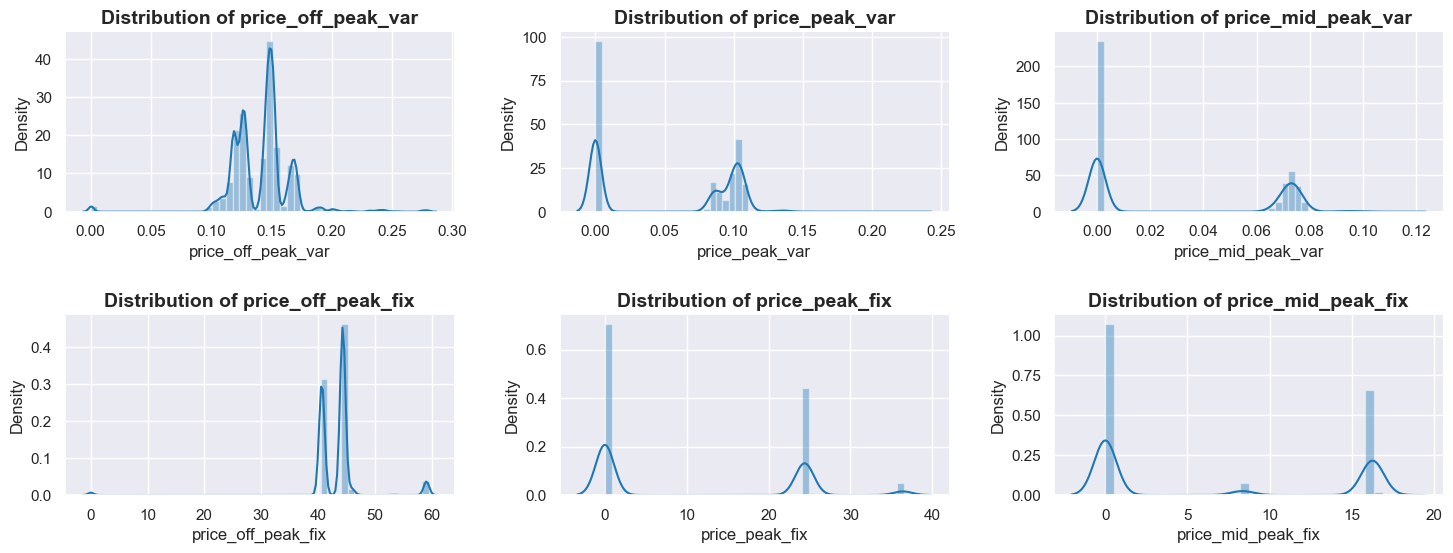

In [33]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i+1)
    sns.distplot(price_df[price_num_cols[i]], color='tab:blue')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

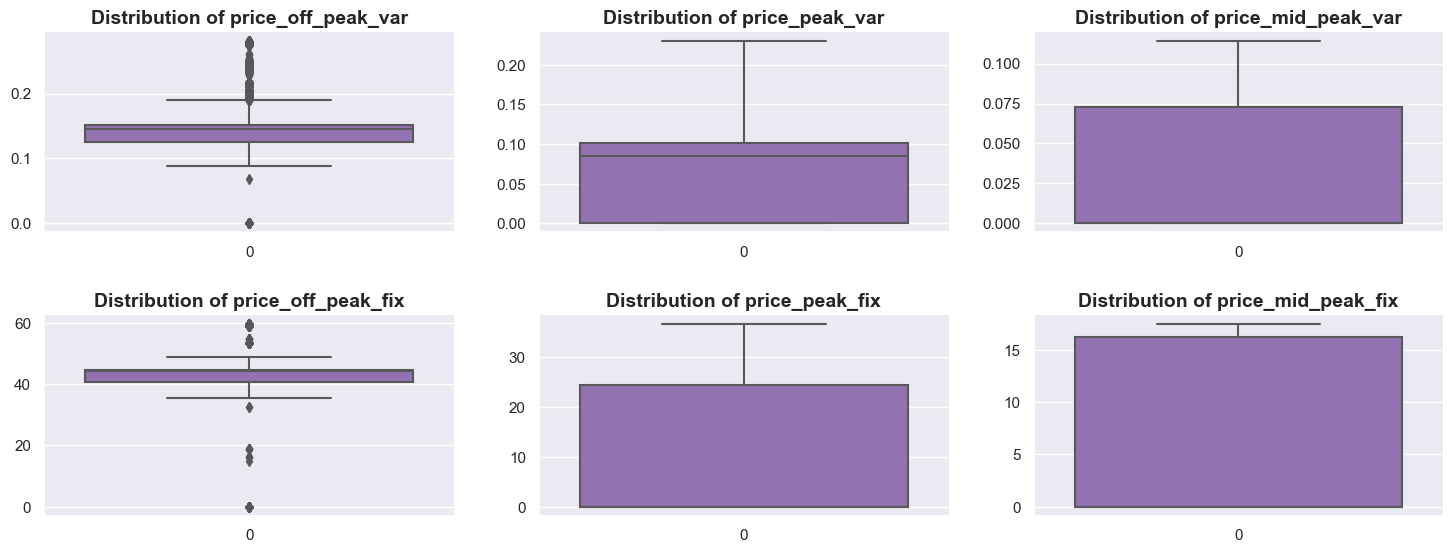

In [34]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(price_df[price_num_cols[i]], color='tab:purple')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

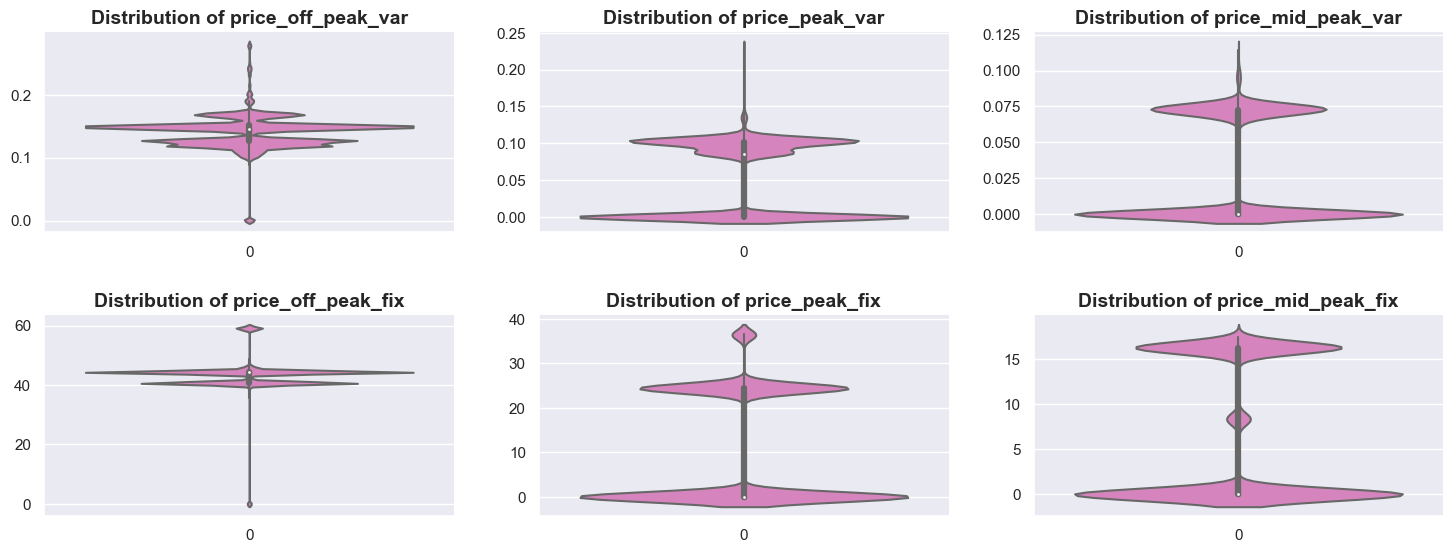

In [35]:
plt.figure(figsize=(15, 6))
for i in range(0, len(price_num_cols)):
    plt.subplot(2, 3, i+1)
    sns.violinplot(price_df[price_num_cols[i]], color='tab:pink')
    sns.despine()
    plt.title(f'Distribution of {price_num_cols[i]}', fontsize=14, weight='bold')
    plt.tight_layout(pad=2)

In [36]:
def categorical_distribution(cat):
    value_counts = cat.value_counts()
    top_most_frequent = value_counts.idxmax()
    percentage = (value_counts.max() / len(cat) * 100).astype(float)

    result = pd.DataFrame({
        'Top most frequent class': [top_most_frequent],
        'Percentage (%)': [percentage]
    })

    return result.round(2)

In [37]:
categorical_distribution(client_cat_cols)

,Top most frequent class,Percentage (%)
0,id,12.5


In [38]:
categorical_distribution(price_cat_cols)

,Top most frequent class,Percentage (%)
0,id,50.0


#### Correlation

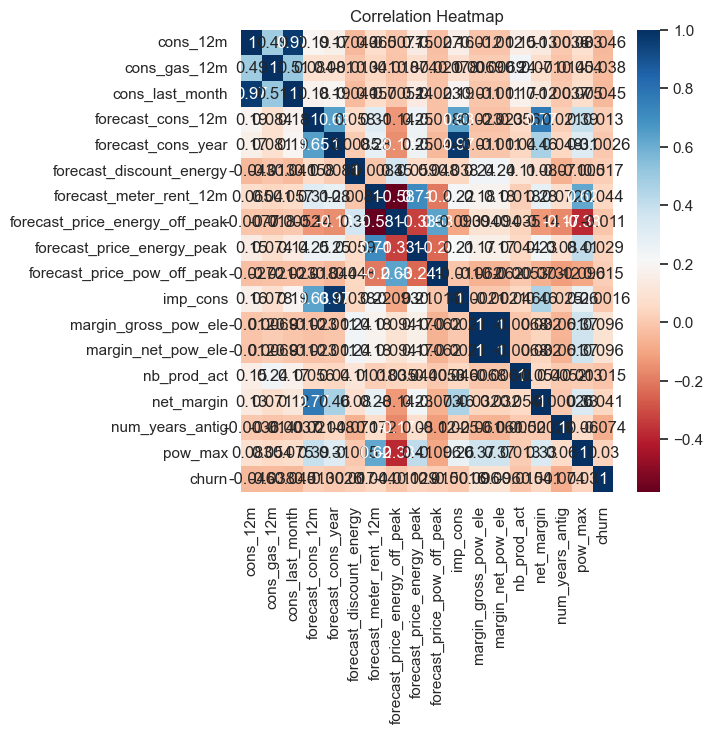

In [39]:
# Filter out only the numeric columns from client_df
client_num_df = client_df[client_num_cols]

# Explore correlations
corr_matrix = client_num_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

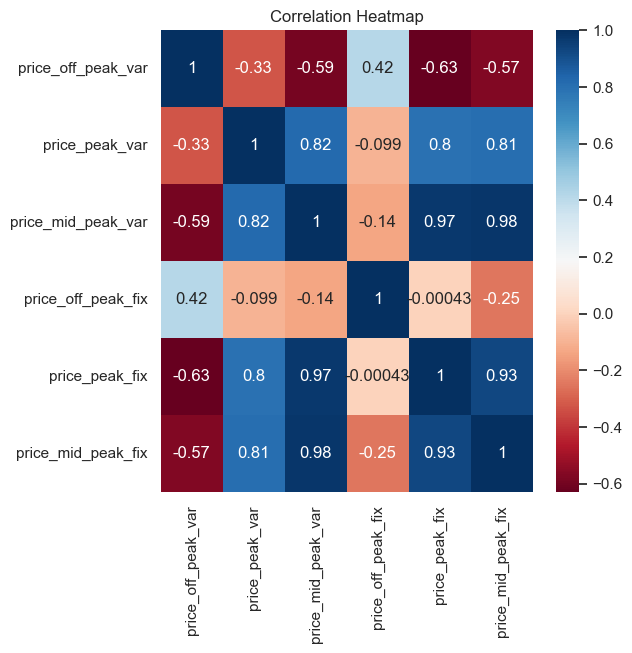

In [40]:
price_num_df = price_df[price_num_cols]

corr_matrix = price_num_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

### Price Sensitivity Analysis

References:
- Yang, S. (2020, October 2). Pricing research — Van Westendorp’s Price Sensitivity Meter in Python. Survey design and analysis in Python. Retrieved from https://sophiamyang.github.io/DS/othermodels/price_sensitivity.html
- Price Intelligently. (2022, April 4). Price Sensitivity, What is it and How is it Measured? Retrieved from https://www.paddle.com/blog/price-sensitivity
- Serdar, E. (n.d.). Price sensitivity: What it is and how to calculate it. Retrieved from https://wynter.com/post/price-sensitivity
- Unknown. (n.d.). How to measure price sensitivity. Retrieved from https://www.surveymonkey.com/market-research/resources/how-to-measure-price-sensitivity

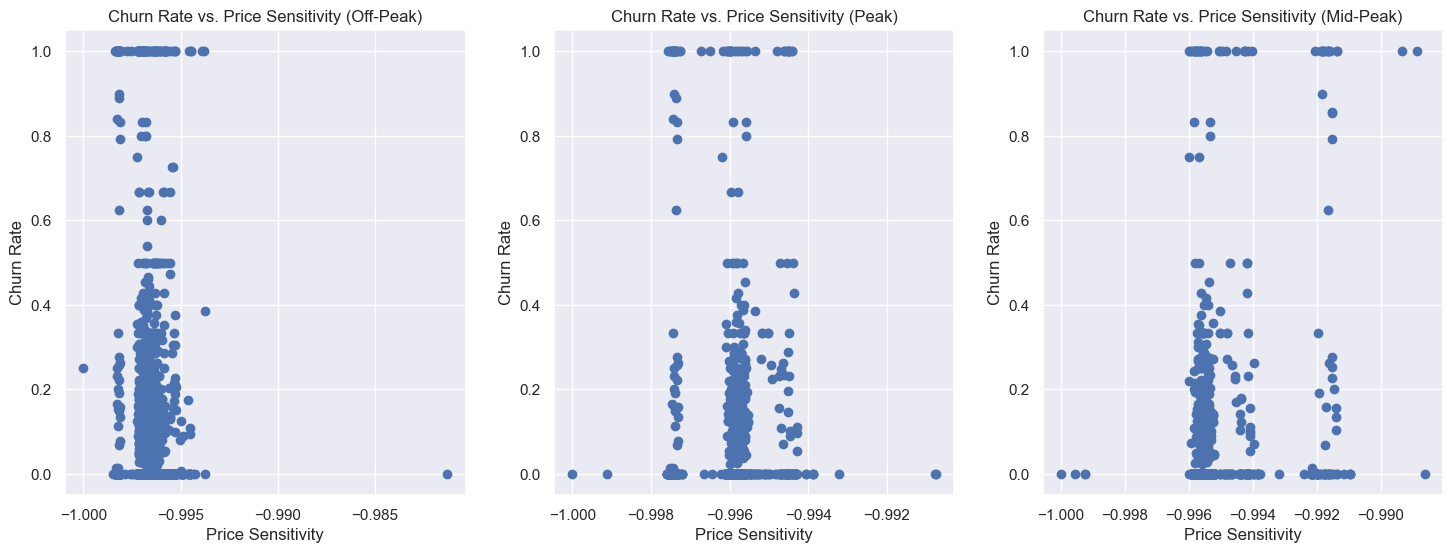

In [41]:
# Calculate price sensitivity (e.g., percentage change in pricing)
price_df['price_off_peak_sensitivity'] = (price_df['price_off_peak_var'] - price_df['price_off_peak_fix']) / price_df['price_off_peak_fix']
price_df['price_peak_sensitivity'] = (price_df['price_peak_var'] - price_df['price_peak_fix']) / price_df['price_peak_fix']
price_df['price_mid_peak_sensitivity'] = (price_df['price_mid_peak_var'] - price_df['price_mid_peak_fix']) / price_df['price_mid_peak_fix']

# Merge customer and pricing data
merged_data = client_df.merge(price_df, on='id', how='inner')

# Calculate churn rates for different price sensitivity levels
off_peak_sensitivity_churn = merged_data.groupby('price_off_peak_sensitivity')['churn'].mean()
peak_sensitivity_churn = merged_data.groupby('price_peak_sensitivity')['churn'].mean()
mid_peak_sensitivity_churn = merged_data.groupby('price_mid_peak_sensitivity')['churn'].mean()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot churn rates for different price sensitivity levels
axes[0].scatter(off_peak_sensitivity_churn.index, off_peak_sensitivity_churn.values)
axes[0].set_title('Churn Rate vs. Price Sensitivity (Off-Peak)')
axes[0].set_xlabel('Price Sensitivity')
axes[0].set_ylabel('Churn Rate')

axes[1].scatter(peak_sensitivity_churn.index, peak_sensitivity_churn.values)
axes[1].set_title('Churn Rate vs. Price Sensitivity (Peak)')
axes[1].set_xlabel('Price Sensitivity')
axes[1].set_ylabel('Churn Rate')

axes[2].scatter(mid_peak_sensitivity_churn.index, mid_peak_sensitivity_churn.values)
axes[2].set_title('Churn Rate vs. Price Sensitivity (Mid-Peak)')
axes[2].set_xlabel('Price Sensitivity')
axes[2].set_ylabel('Churn Rate')

plt.tight_layout(pad=2)
plt.show()

In [42]:
# pip install hvplot

In [43]:
# pip install holoviews

In [44]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [45]:
# Calculate churn rates for different price sensitivity levels
off_peak_sensitivity_churn = merged_data.groupby('price_off_peak_sensitivity')['churn'].mean()
peak_sensitivity_churn = merged_data.groupby('price_peak_sensitivity')['churn'].mean()
mid_peak_sensitivity_churn = merged_data.groupby('price_mid_peak_sensitivity')['churn'].mean()

# Reset indices to create numeric index
off_peak_sensitivity_churn.reset_index(drop=True, inplace=True)
peak_sensitivity_churn.reset_index(drop=True, inplace=True)
mid_peak_sensitivity_churn.reset_index(drop=True, inplace=True)

# Create the prices dictionary
prices = {
    'Off Peak': off_peak_sensitivity_churn,
    'Peak': peak_sensitivity_churn,
    'Mid Peak': mid_peak_sensitivity_churn,
}

# Create the DataFrame
df = pd.DataFrame(prices)

In [46]:
df.head()

,Off Peak,Peak,Mid Peak
0,0.25,0.0,0.00
1,0.00,0.0,0.00
2,0.00,0.0,0.00
3,0.00,0.0,0.00
4,0.00,0.0,0.75


In [47]:
def price_sensitivity_meter(df, interpolate=False):
    # Convert data from wide to long
    # Calculate frequency of each price for each group
    df1 = (df[['Off Peak', 'Peak', 'Mid Peak']]
             .unstack()
             .reset_index()
             .rename(columns={'level_0': 'label', 0: 'prices'})[['label', 'prices']]
             .groupby(['label', 'prices'])
             .size()
             .reset_index()
             .rename(columns={0: 'frequency'})
            )
    # Calculate cumsum percentages
    df1['cumsum'] = df1.groupby(['label'])['frequency'].cumsum()
    df1['sum'] = df1.groupby(['label'])['frequency'].transform('sum')
    df1['percentage'] = 100 * df1['cumsum'] / df1['sum']
    # Convert data from long back to wide
    df2 = df1.pivot_table('percentage', 'prices', 'label')
    
    # Take linear values in missing values
    if interpolate:
        df3 = df2.interpolate().fillna(0)
        plot = df3.hvplot(x='prices', 
                          y=['Off Peak', 'Peak', 'Mid Peak'],
                          ylabel='Percentage',
                          height=400,
                          color=['lightblue', 'lightgreen', 'lightpink']
                              ).opts(legend_position='bottom')
    
    # Forward fill 
    else: 
        df3 = df2.ffill().fillna(0)
        plot = df3.hvplot.step(x='prices', 
                               y=['Off Peak', 'Peak', 'Mid Peak'],
                               where='post',
                               ylabel='Percentage',
                               height=400,
                               color=['lightblue', 'lightgreen', 'lightpink']
                              ).opts(legend_position='bottom')
    df3['optimal_diff'] = (df3['Off Peak'] - df3['Mid Peak'])
    df3['left_diff'] = (df3['Off Peak'] - df3['Peak'])
    df3['right_diff'] = (df3['Mid Peak'] - df3['Peak'])
    optimal = df3[df3['optimal_diff'] <= 0].index[0]
    lower_bound = df3[df3['left_diff'] <= 0].index[0]
    upper_bound = df3[df3['right_diff'] >= 0].index[0]

    optimal_index = int(optimal)
    lower_bound_index = int(lower_bound)
    upper_bound_index = int(upper_bound)
    
    optimal_line = hv.VLine(df3.index[optimal_index]).opts(color='blue', line_dash='dashed', line_width=0.4)
    lower_line = hv.VLine(df3.index[lower_bound_index]).opts(color='green', line_dash='dashed', line_width=0.4)
    upper_line = hv.VLine(df3.index[upper_bound_index]).opts(color='pink', line_dash='dashed', line_width=0.4)

    # print(f'Optimal Price: ${df3.index[optimal]}')
    # print(f'Acceptable Price Range: ${df3.index[lower_bound]} to ${df3.index[upper_bound]}')
    
    return plot * lower_line * optimal_line * upper_line


In [48]:
plot_off_peak = price_sensitivity_meter(off_peak_sensitivity_churn[['price_off_peak_var']])
plot_peak = price_sensitivity_meter(peak_sensitivity_churn[['price_peak_var']])
plot_mid_peak = price_sensitivity_meter(mid_peak_sensitivity_churn[['price_mid_peak_var']])

KeyError: "None of [Index(['price_off_peak_var'], dtype='object')] are in the [index]"

In [ ]:
# Call the price_sensitivity_meter function for each sensitivity level
plot_off_peak = price_sensitivity_meter(off_peak_sensitivity_churn)
plot_peak = price_sensitivity_meter(peak_sensitivity_churn)
plot_mid_peak = price_sensitivity_meter(mid_peak_sensitivity_churn)

KeyError: "None of [Index(['Off Peak', 'Peak', 'Mid Peak'], dtype='object')] are in the [index]"